In [ ]:
import pandas as pd
file_path = 'Downloads/archive/ratings_small.csv'
ratings_data = pd.read_csv(file_path)
ratings_data.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD, KNNBasic


file_path = 'Downloads/archive/ratings_small.csv'
ratings_data = pd.read_csv(file_path)
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)
pmf = SVD(biased=False)
user_cf = KNNBasic(sim_options={'user_based': True})
item_cf = KNNBasic(sim_options={'user_based': False})

pmf_results = cross_validate(pmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
user_cf_results = cross_validate(user_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
item_cf_results = cross_validate(item_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("PMF Results RMSE:", pmf_results['test_rmse'].mean())
print("User-based CF Results RMSE:", user_cf_results['test_rmse'].mean())
print("Item-based CF Results RMSE:", item_cf_results['test_rmse'].mean())
print("PMF Results MAE:", pmf_results['test_mae'].mean())
print("User-based CF Results MAE:", user_cf_results['test_mae'].mean())
print("Item-based CF Results MAE:", item_cf_results['test_mae'].mean())


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0144  1.0143  1.0148  1.0178  1.0079  1.0138  0.0032  
MAE (testset)     0.7799  0.7818  0.7826  0.7849  0.7780  0.7814  0.0023  
Fit time          0.35    0.36    0.35    0.35    0.35    0.35    0.01    
Test time         0.03    0.03    0.03    0.03    0.03    0.03    0.00    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9687  0.9698  0.9637  0.9765  0.9604  0.9678  0.0055

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

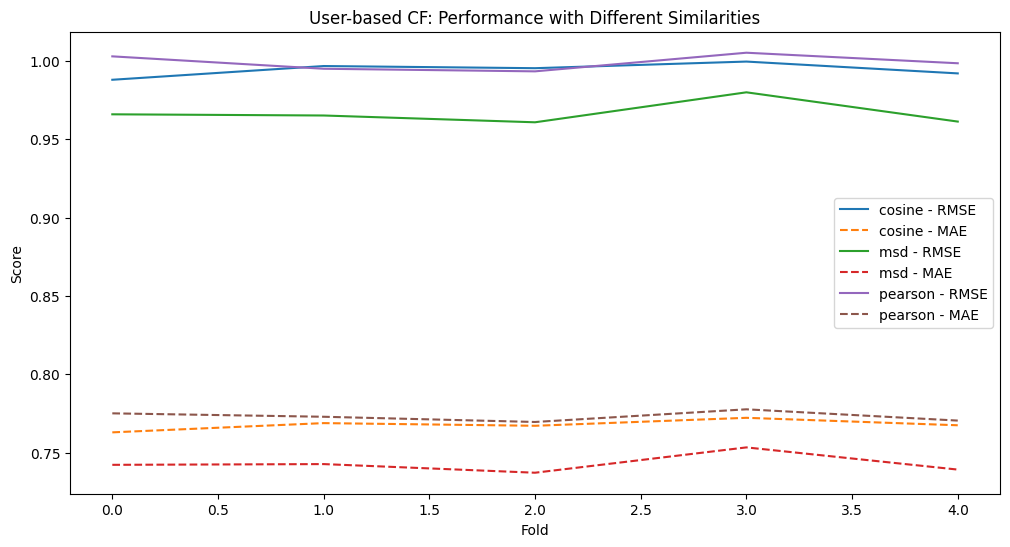

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

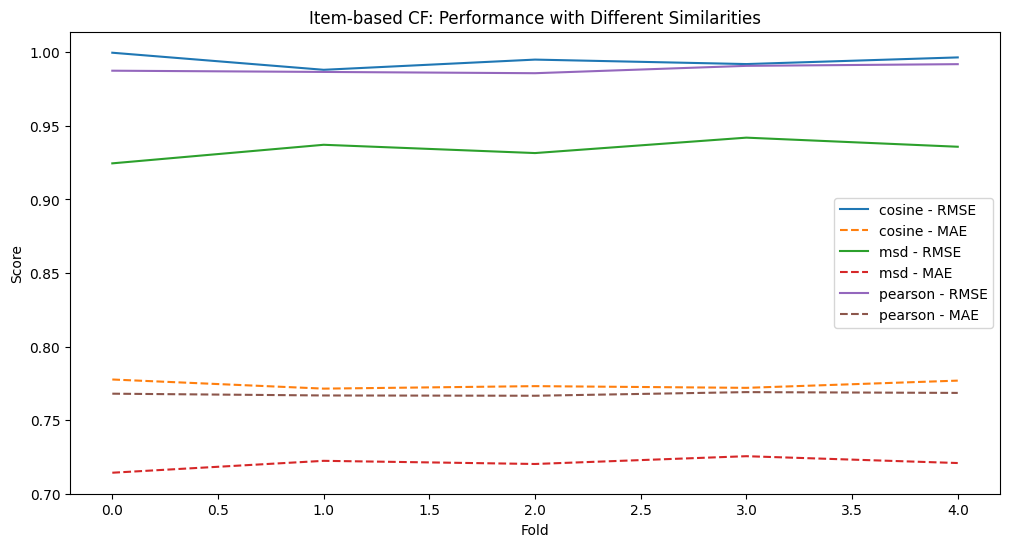

In [ ]:
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import KFold
import matplotlib.pyplot as plt

reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)
sim_options = ['cosine', 'msd', 'pearson']

def evaluate(similarity_metric, user_based):
    algo = KNNBasic(sim_options={'name': similarity_metric, 'user_based': user_based})
    kf = KFold(n_splits=5)
    rmse_scores = []
    mae_scores = []

    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        rmse_scores.append(accuracy.rmse(predictions, verbose=False))
        mae_scores.append(accuracy.mae(predictions, verbose=False))

    return rmse_scores, mae_scores


def plot_metrics(metrics, title):
    plt.figure(figsize=(12, 6))
    for metric, (rmse, mae) in metrics.items():
        plt.plot(rmse, label=f'{metric} - RMSE')
        plt.plot(mae, label=f'{metric} - MAE', linestyle='dashed')
    plt.title(title)
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.legend()
    plt.show()


user_based_metrics = {metric: evaluate(metric, True) for metric in sim_options}
plot_metrics(user_based_metrics, 'User-based CF: Performance with Different Similarities')


item_based_metrics = {metric: evaluate(metric, False) for metric in sim_options}
plot_metrics(item_based_metrics, 'Item-based CF: Performance with Different Similarities')


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

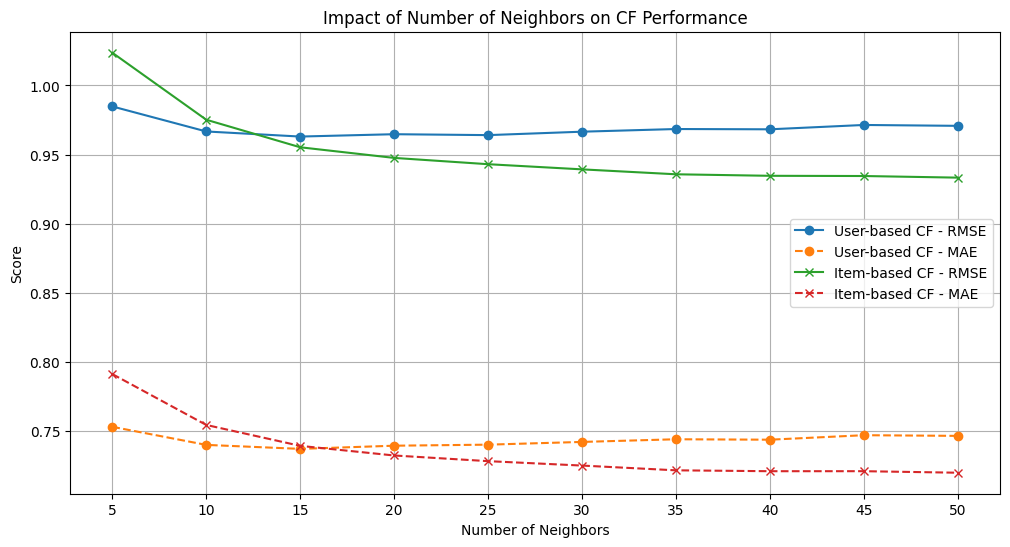

In [ ]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)


neighbors = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


def evaluate_neighbors(algorithm, data, neighbor_list, user_based):
    rmse_results = []
    mae_results = []

    for k in neighbor_list:
        algo = algorithm(k=k, sim_options={'name': 'msd', 'user_based': user_based})
        results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
        rmse_results.append(sum(results['test_rmse']) / len(results['test_rmse']))
        mae_results.append(sum(results['test_mae']) / len(results['test_mae']))

    return rmse_results, mae_results

user_based_rmse, user_based_mae = evaluate_neighbors(KNNBasic, data, neighbors, True)

item_based_rmse, item_based_mae = evaluate_neighbors(KNNBasic, data, neighbors, False)


plt.figure(figsize=(12, 6))
plt.plot(neighbors, user_based_rmse, label='User-based CF - RMSE', marker='o')
plt.plot(neighbors, user_based_mae, label='User-based CF - MAE', marker='o', linestyle='dashed')
plt.plot(neighbors, item_based_rmse, label='Item-based CF - RMSE', marker='x')
plt.plot(neighbors, item_based_mae, label='Item-based CF - MAE', marker='x', linestyle='dashed')
plt.title('Impact of Number of Neighbors on CF Performance')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.xticks(neighbors)
plt.legend()
plt.grid()
plt.show()


In [ ]:

def find_best_k(rmse_results, neighbors):
    min_rmse = min(rmse_results)
    best_k = neighbors[rmse_results.index(min_rmse)]
    return best_k, min_rmse

best_k_user, min_rmse_user = find_best_k(user_based_rmse, neighbors)

best_k_item, min_rmse_item = find_best_k(item_based_rmse, neighbors)

print(f"Best K for User-based CF: {best_k_user} with RMSE: {min_rmse_user}")
print(f"Best K for Item-based CF: {best_k_item} with RMSE: {min_rmse_item}")


Best K for User-based CF: 15 with RMSE: 0.9630084721842417
Best K for Item-based CF: 50 with RMSE: 0.9332688812799468
